In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# AB Data = The impact of a new website page design on purchases

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
df['converted'].mean()

0.11965919355605512

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [6]:
# Data that is incorrect (should not be) and should be removed from the data table.

df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [7]:
# Data that is incorrect (should not be) and should be removed from the data table.

df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [13]:
# Merge data frames that were correct and should be (i.e., data that was incorrect is removed)
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [14]:
df2.shape

(290585, 5)

In [15]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [16]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [17]:
# Summary of duplicates

sum(df2['user_id'].duplicated())

1

In [18]:
# Keep the first duplicate in the data frame

df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [21]:
# Reverse the above command (get all of them except the one that was duplicate)

df2 = df2[~df2.user_id.duplicated(keep='first')]

In [22]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [23]:
df2.converted.mean() * 100

11.959708724499627

In [24]:
df2_control = df2.query('group == "control"')
df2_treatment = df2.query('group == "treatment"')

In [25]:
df2_control['converted'].mean() * 100

12.03863045004612

In [26]:
df2_treatment['converted'].mean() * 100

11.880806551510565

In [27]:
df2['converted'].mean()

0.11959708724499628

In [28]:
1 - df2['converted'].mean()

0.8804029127550037

In [29]:
len(df2_treatment)

145310

In [30]:
# AB Test for the probability of decreased purchases from the new page

new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[df2.converted.mean(), 1 - df2.converted.mean()])

In [31]:
new_page_converted

array([0, 0, 1, ..., 0, 1, 0])

(array([127945.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17365.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

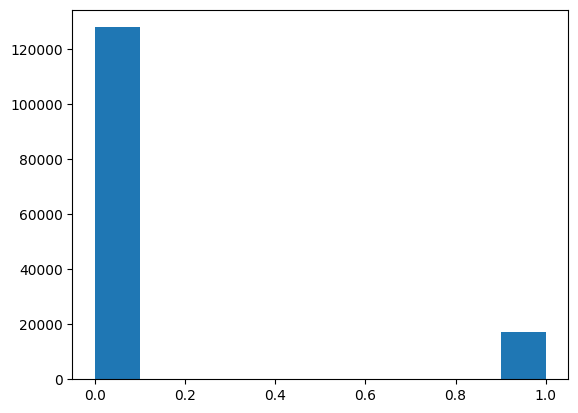

In [32]:
plt.hist(new_page_converted)

In [34]:
# # AB Test for the probability of decreased purchases from the old page

new_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2.converted.mean(), 1 - df2.converted.mean()])

In [35]:
# Or use the binomial distribution
new_page_converted = np.random.binomial(len(df2_treatment), df2.converted.mean(), 1000) / len(df2_treatment)

old_page_converted = np.random.binomial(len(df2_control), df2.converted.mean(), 1000) / len(df2_control)

In [36]:
old_page_converted

array([0.12023487, 0.11918857, 0.11998018, 0.11887881, 0.11834189,
       0.11904401, 0.11964977, 0.11947768, 0.12106089, 0.11928494,
       0.11974613, 0.11988381, 0.12042761, 0.1197186 , 0.1202624 ,
       0.11900271, 0.11931936, 0.12163911, 0.12002836, 0.12050332,
       0.11951209, 0.11822487, 0.11952586, 0.11991822, 0.11989757,
       0.12053774, 0.11936754, 0.12000083, 0.11885816, 0.11943638,
       0.12111596, 0.11898895, 0.11985627, 0.11983562, 0.11957405,
       0.11940884, 0.12113661, 0.11916103, 0.1198012 , 0.1191748 ,
       0.12039319, 0.11885127, 0.11946391, 0.11967042, 0.11993199,
       0.11906466, 0.11838319, 0.11911285, 0.11837631, 0.12043449,
       0.11885127, 0.12003524, 0.11876179, 0.11918168, 0.11930559,
       0.11962223, 0.11990446, 0.11984939, 0.12051709, 0.12051021,
       0.11995264, 0.12000083, 0.11863788, 0.11916103, 0.11973237,
       0.11892699, 0.11982874, 0.11803902, 0.11922299, 0.12002836,
       0.12055151, 0.11911285, 0.1202211 , 0.12040696, 0.11964

In [37]:
p_diffs = new_page_converted - old_page_converted

In [38]:
p_diffs.mean()

-4.535996249705274e-05

In [42]:
ab_data_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
ab_data_diff

-0.0015782389853555567

In [43]:
# How many times is the difference created by chance greather than the actual difference

(p_diffs > ab_data_diff).mean() * 100

90.60000000000001

In [44]:
# How many times is the difference created by chance less than the actual difference
# If it was below 5%(Treshold), we say that the new purchase significantly reduced purchases
# Otherwise, the differences may have been based on chance (i.e., we did not reach the conclusion that the new design reduces sales)

(p_diffs < ab_data_diff).mean() * 100

9.4

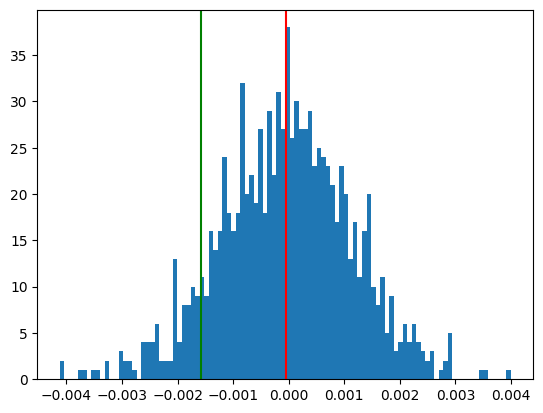

In [45]:
from turtle import color


plt.hist(p_diffs, bins=100)
low = ab_data_diff
hight = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=hight, color='r')